<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-utilizado" data-toc-modified-id="Dataset-utilizado-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset utilizado</a></span><ul class="toc-item"><li><span><a href="#Número-de-amostras-e-colunas" data-toc-modified-id="Número-de-amostras-e-colunas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Número de amostras e colunas</a></span></li></ul></li><li><span><a href="#Filtrando-o-game_mode-e-lobby_type" data-toc-modified-id="Filtrando-o-game_mode-e-lobby_type-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Filtrando o <code>game_mode</code> e <code>lobby_type</code></a></span><ul class="toc-item"><li><span><a href="#Entendendo-as-distribuições" data-toc-modified-id="Entendendo-as-distribuições-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Entendendo as distribuições</a></span></li><li><span><a href="#Análise" data-toc-modified-id="Análise-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Análise</a></span></li><li><span><a href="#Vitórias-por-time" data-toc-modified-id="Vitórias-por-time-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Vitórias por time</a></span></li></ul></li><li><span><a href="#Transformar-dados-para-o-treinamento" data-toc-modified-id="Transformar-dados-para-o-treinamento-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transformar dados para o treinamento</a></span></li><li><span><a href="#Separar-dados-para-treinamento" data-toc-modified-id="Separar-dados-para-treinamento-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Separar dados para treinamento</a></span></li><li><span><a href="#Treinar-modelos-de-classificação" data-toc-modified-id="Treinar-modelos-de-classificação-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Treinar modelos de classificação</a></span><ul class="toc-item"><li><span><a href="#Declarando-modelos" data-toc-modified-id="Declarando-modelos-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Declarando modelos</a></span></li><li><span><a href="#Treinamento" data-toc-modified-id="Treinamento-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Treinamento</a></span></li></ul></li><li><span><a href="#Mostrando-e-salvando-Resultados" data-toc-modified-id="Mostrando-e-salvando-Resultados-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Mostrando e salvando Resultados</a></span><ul class="toc-item"><li><span><a href="#Salvando-resultados-dos-modelos" data-toc-modified-id="Salvando-resultados-dos-modelos-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Salvando resultados dos modelos</a></span></li><li><span><a href="#Gráfico-de-comparação" data-toc-modified-id="Gráfico-de-comparação-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Gráfico de comparação</a></span></li></ul></li><li><span><a href="#Conclusão-e-próximos-passos" data-toc-modified-id="Conclusão-e-próximos-passos-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusão e próximos passos</a></span></li></ul></div>

---
# Experimento 2: Filtrar game mode e lobby type nos modelos 

**Objetivo do experimento:** Treinar diferentes modelos, filtrando apenas alguns tipos de `game_mode` e `lobby_type` para entender se são relevantes para a predição final. 


**Formato do experimento:** Serão utilizadas todas as variáveis do arquivo ``2021-08-03_working_data.csv``. 
1. Os dados serão divididos em 5 conjuntos, onde será aplicada uma validação cruzada;
2. O passo 1 será repetido 3 vezes com os dados sendo separados aleatoriamente em cada uma das vezes;
3. Será calculada a acurácia média destes 15 conjuntos de teste;

**Os seguintes modelos serão usados:**

- KNN
- Random Forest
- Rede Neural
- XGBoost
- Naive Bayes

**Métrica de avaliação:** Acurácia média dos dados de testes nos 15 conjuntos de dados: 3 validações cruzadas, onde cada validação possui 1 conjunto de teste.

---
**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

**Loading data**

In [2]:
raw_data_path = '../data/raw_data/'
data_path = '../data/working_data/'


file = '2021-08-03_working_data.csv'
df_original = pd.read_csv(data_path+file)

game_mode_df = pd.read_json(raw_data_path+'game_mode.json').T
lobby_type_df = pd.read_json(raw_data_path+'lobby_type.json').T

**Setting output path**

In [3]:
output_savepath = '../3.Experiments_output/02.Exp_Filtrar_Game_type_e_Lobby/'

---
## Dataset utilizado

Por se tratar do modelo de baseline os dados referentes à lobby_type e game_mode não foram removidos. 


### Número de amostras e colunas

In [4]:
print('Número total de amostras:', df_original.shape)
print('Colunas:\n', df_original.columns)
df_original.head()

Número total de amostras: (113400, 15)
Colunas:
 Index(['radiant_win', 'avg_mmr', 'duration', 'lobby_type', 'game_mode',
       'Radiant 1', 'Radiant 2', 'Radiant 3', 'Radiant 4', 'Radiant 5',
       'Dire 1', 'Dire 2', 'Dire 3', 'Dire 4', 'Dire 5'],
      dtype='object')


,radiant_win,avg_mmr,duration,lobby_type,game_mode,Radiant 1,Radiant 2,Radiant 3,Radiant 4,Radiant 5,Dire 1,Dire 2,Dire 3,Dire 4,Dire 5
0,0,4104,2147,7,22,94,67,112,5,16.0,14,90,52,1,121
1,0,6421,1526,7,22,72,9,58,89,16.0,79,25,12,119,120
2,1,5062,1323,7,22,111,48,53,101,26.0,31,41,10,88,62
3,1,3943,1956,7,22,41,83,74,123,114.0,109,22,98,107,30
4,0,3515,2087,7,3,59,112,4,41,31.0,88,11,96,110,10


**Informações gerais**

In [5]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
radiant_win,113400.0,0.525688,0.499342,0.0,0.0,1.0,1.0,1.0
avg_mmr,113400.0,4040.530159,474.736865,3500.0,3693.0,3932.0,4247.0,8494.0
duration,113400.0,2329.575855,580.650954,362.0,1956.0,2273.0,2650.0,7408.0
lobby_type,113400.0,5.457910,2.903710,0.0,7.0,7.0,7.0,9.0
game_mode,113400.0,19.296825,6.618990,1.0,22.0,22.0,22.0,22.0
Radiant 1,113400.0,57.951605,37.693319,1.0,25.0,52.0,90.0,135.0
Radiant 2,113400.0,57.736561,37.661342,1.0,25.0,52.0,90.0,135.0
Radiant 3,113400.0,57.960388,37.783283,1.0,25.0,52.0,90.0,135.0
Radiant 4,113400.0,57.856984,37.768054,1.0,25.0,52.0,90.0,135.0
Radiant 5,113399.0,57.733410,37.694819,1.0,25.0,52.0,90.0,135.0


---
## Filtrando o `game_mode` e `lobby_type`
**Ajustando Data Frame**

In [6]:
df = df_original.copy()

dict_game_mode = dict(zip(game_mode_df['id'], game_mode_df['name']))
dict_lobby_type = dict(zip(lobby_type_df['id'], lobby_type_df['name']))
df['game_mode'].replace(dict_game_mode, inplace=True)
df['lobby_type'].replace(dict_lobby_type, inplace=True)

### Entendendo as distribuições

,game_mode
game_mode_all_draft,97184
game_mode_random_draft,14011
game_mode_single_draft,1886
game_mode_captains_mode,316
game_mode_all_pick,3


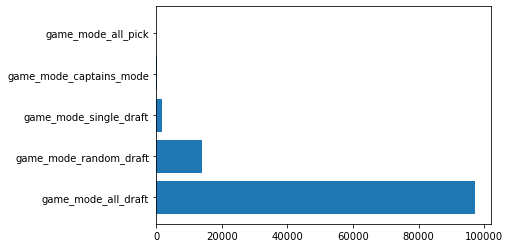

In [7]:
g_mode = df['game_mode'].value_counts()
plt.barh(y=g_mode.index, width=g_mode)
display(pd.DataFrame(g_mode))

,lobby_type
lobby_type_ranked,88208
lobby_type_normal,24889
lobby_type_practice,157
lobby_type_battle_cup,146


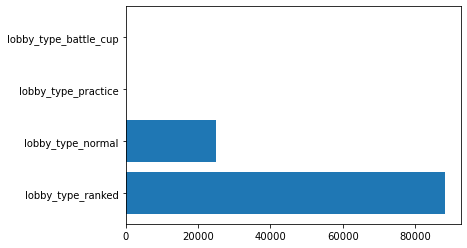

In [8]:
l_type = df['lobby_type'].value_counts()
plt.barh(y=l_type.index, width=l_type)
display(pd.DataFrame(l_type))

### Análise

Devido ao alto número de amostras, selecionarei apenas partidas com:
- `game_mode`: game_mode_all_draft	
- `lobby_type`: lobby_type_ranked	

In [9]:
print('Formato do dataframe:', df.shape)
df = df[df['game_mode'] == 'game_mode_all_draft']
df = df[df['lobby_type'] == 'lobby_type_ranked']
print('Formato do dataframe após remoção:', df.shape)

Formato do dataframe: (113400, 15)
Formato do dataframe após remoção: (77244, 15)


### Vitórias por time

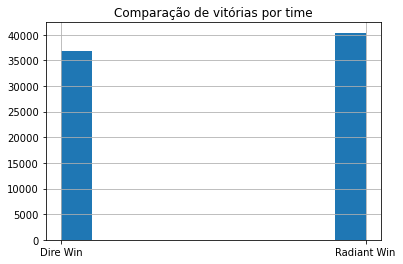

Percentual:


1    0.522798
0    0.477202
Name: radiant_win, dtype: float64

In [10]:
df['radiant_win'].hist()
plt.title('Comparação de vitórias por time')
plt.xticks([0,1],['Dire Win', 'Radiant Win'])
plt.show()

print('Percentual:')
df['radiant_win'].value_counts(normalize=True)

---
## Transformar dados para o treinamento

As seguintes colunas serão removidas:
- `game_mode`
- `lobby_type`

In [11]:
print('Formato do dataframe:', df.shape)
columns_to_drop = ['game_mode','lobby_type']
df.drop(columns=columns_to_drop, inplace=True)
print('Formato do dataframe após remover colunas:', df.shape)

Formato do dataframe: (77244, 15)
Formato do dataframe após remover colunas: (77244, 13)


---
## Separar dados para treinamento

In [12]:
colum_names = df.columns

y_column = ['radiant_win']
X_columns = set(colum_names) - set(y_column)

X = df[X_columns]
y = df[y_column[0]].values


**Configurar os folds para a validação cruzada**

In [13]:
n_folds = 5
repeated_cv = 3
cv = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeated_cv, random_state=1)

---
## Treinar modelos de classificação

### Declarando modelos

In [14]:
model_names = ['KNN', 'Random Forest', 'Rede Neural', 'XGBoost', 'Naive Bayes']
scores = [None] * len(model_names)

# Declaring models
KNN_model = KNeighborsClassifier(n_neighbors=5)
RdnForest_model = RandomForestClassifier(n_estimators=300)
RNN_model = MLPClassifier()
XGB_model = XGBClassifier(n_estimators=300)
Naive_model = GaussianNB()

models_lst = [KNN_model, RdnForest_model, RNN_model, XGB_model, Naive_model]

### Treinamento

In [15]:
for i, model in enumerate(models_lst):
    print('---------\nTraining model: ', model_names[i])
    scores[i] = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Model '+model_names[i]+ ' mean score:', round(np.mean(scores[i]),2))

---------
Training model:  KNN
Model KNN mean score: 0.51
---------
Training model:  Random Forest
Model Random Forest mean score: 0.53
---------
Training model:  Rede Neural
Model Rede Neural mean score: 0.51
---------
Training model:  XGBoost
Model XGBoost mean score: 0.54
---------
Training model:  Naive Bayes
Model Naive Bayes mean score: 0.53


---
## Mostrando e salvando Resultados

### Salvando resultados dos modelos

In [16]:
result_df = pd.DataFrame()
for i, name in enumerate(model_names):
    series_result = pd.DataFrame(scores[i], columns=[name])
    result_df = pd.concat([result_df, series_result], axis=1)
    
display(result_df)
result_df.to_csv(output_savepath+'score_exp02.csv', index=False)

,KNN,Random Forest,Rede Neural,XGBoost,Naive Bayes
0,0.508382,0.529484,0.485015,0.530973,0.526053
1,0.517898,0.529225,0.524694,0.534404,0.532979
2,0.510454,0.528254,0.519063,0.533303,0.535180
3,0.504110,0.524694,0.522688,0.523400,0.524824
4,0.508221,0.525117,0.523757,0.539811,0.526541
5,0.508577,0.532721,0.483332,0.540164,0.529419
6,0.508577,0.530520,0.522688,0.536216,0.531232
7,0.509806,0.526636,0.522752,0.539970,0.530455
8,0.511036,0.530067,0.491618,0.534598,0.528319
9,0.505761,0.531201,0.518902,0.535992,0.533143


### Gráfico de comparação

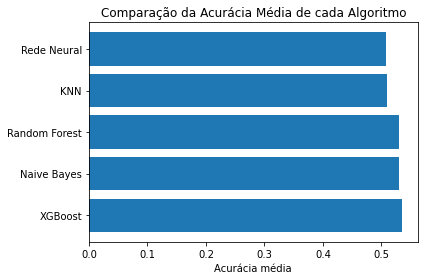

In [17]:
width_plot = result_df.mean().sort_values(ascending=False)

x_plot = width_plot.index.values

plt.barh(y=x_plot, width=width_plot)
plt.title('Comparação da Acurácia Média de cada Algoritmo')
plt.xlabel('Acurácia média')
plt.tight_layout()

plt.savefig(output_savepath+'comparacao_acuracia_modelos_exp02')

---
## Conclusão e próximos passos

Apenas o modelo Random Forest obteve uma acurácia média maior que 53%, isto indica que a seleção de um único modo de jogo e um único lobby_type não foi o suficiente para melhorar os resultados. Os próximos passos devem consistir de:

- Fazer um modelo para cada 'tier' de jogadores, usando o mmr médio para esta filtragem.